In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [45]:
diabetes = pd.read_csv('pdiabetes.csv')

In [46]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
no = diabetes.groupby('Outcome')
list = no.size()
#for i,y in no:
    #print(i)
  #  list.append(y.Outcome.size())

list

Outcome
0    500
1    268
dtype: int64

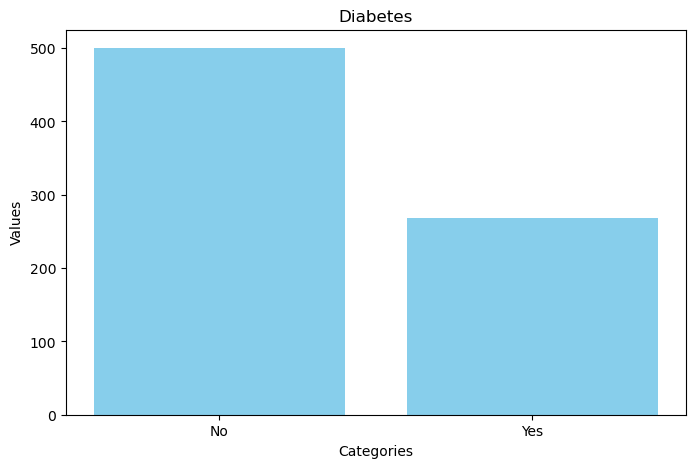

In [48]:

# Sample data
categories = ['No', 'Yes']
values = list

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Diabetes')
plt.show()


In [49]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
diabetes[(diabetes['Age'] > 40)&(diabetes['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [51]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes.Outcome

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=56)

In [60]:
### Model 1: Logistic Regression without Feature Scaling ###

# Create and train the model
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)

# Predict on test set
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Calculate accuracy
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Accuracy without Feature Scaling:", accuracy_no_scaling)

Accuracy without Feature Scaling: 0.8376623376623377


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
# Create and train the model with scaled features
model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)

# Predict on test set with scaled features
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Calculate accuracy
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Accuracy with Feature Scaling:", accuracy_with_scaling)

Accuracy with Feature Scaling: 0.8311688311688312
